# Alpha Blending

Alpha blending is the process of overlaying a foreground image with transparency over a background image. The transparency is often the fourth channel of an image ( e.g. in a transparent PNG), but it can also be a separate image. This transparency mask is often called the **alpha mask** or the **alpha matte**.

The math behind alpha blending is straightforward. At **every pixel** of the image, we need to combine the foreground image color (F) and the background image color (B) using the alpha mask (⍺).

**Note**: The value of ⍺ used in the equation is actually the pixel value in the alpha mask divided by 255. So, the final alpha blended image(I) is given by the equation below, 0≤ ⍺ ≤ 1
$$ 
I = \alpha F + (1−\alpha) B 
$$

From the equation above, one can make the following observations.

1. When $\alpha$ = 0, the output pixel color is the background.

2. When $\alpha$ = 1, the output pixel color is simply the foreground.

3. When $0 \leq \alpha \leq 1$, the output pixel color is a mix of the background and the foreground. For realistic blending, the boundary of the alpha mask usually has pixels that are between 0 and 1.

Let us look at an example.
<table style="width:100%">
  <tr>
    <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-backgroundImage.jpg"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-backgroundImage.jpg"/></a></center></th>
    <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-foregroundImage.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-foregroundImage.png"/></a></center></th>
  </tr>
  <tr>
      <td><center>Background Image</center></td>
      <td><center>Foreground Image</center></td>
  </tr>
  <tr>
    <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-alphaMask.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-alphaMask.png"/></a></center></th>
    <th><center> <a href="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-alphaBlendedmage.png"><img src = "https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w4-m1-alphaBlendedmage.png"/></a></center></th>
  </tr>
  <tr>
      <td><center>Alpha Mask</center></td>
      <td><center>Alpha Blended Image</center></td>
  </tr>
  <tr>
    <td colspan="2"><center>The background image is shown on the top left, the foreground image is shown on the top right,  the gray scale alpha mask is shown on the bottom left,  and the composite image obtained by alpha blending the foreground image and the background image using an alpha mask is shown in the bottom right.</center></td>
  </tr>
</table>

## Alpha Blending in OpenCV

The following Python code provides the implementation of Alpha Blending. The comments in code explain the various steps. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

The function takes the foreground and background images and adds them on the basis of an alpha mask using the equation described above.

In [3]:
# Read the foreground image with alpha channel
foreGroundImage = cv2.imread(DATA_PATH + "images/foreGroundAssetLarge.png", -1)

# Split png foreground image
b,g,r,a = cv2.split(foreGroundImage)

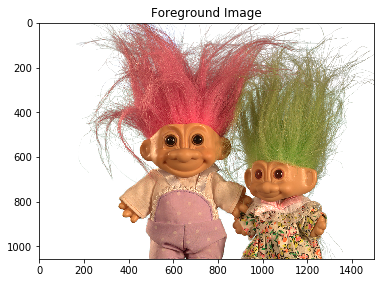

In [4]:
# Reverse B,G,R channels
plt.imshow(foreGroundImage[:,:,[2,1,0,3]])
plt.title("Foreground Image")
plt.show()

Then we split the image into the 4 channels, alpha mask being the 4th channel.

We create the foreground image with the first 3 channels and the mask using the 4th channel. 

Then we read the background image. We convert the foreground and background images to float before blending them.

In [5]:
# Save the foregroung RGB content into a single object
foreground = cv2.merge((b,g,r))

# Save the alpha information into a single Mat
alpha = cv2.merge((a,a,a))

# Read background image
background = cv2.imread(DATA_PATH + "images/backGroundLarge.jpg")

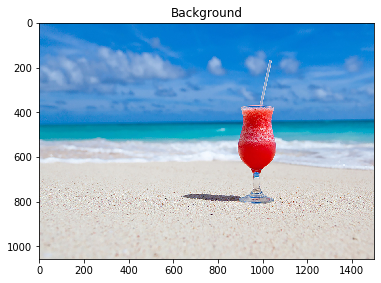

In [6]:
plt.imshow(background[:,:,::-1])
plt.title("Background")
plt.show()

In [7]:
# Convert uint8 to float
foreground = foreground.astype(float)
background = background.astype(float)
alpha = alpha.astype(float)/255

# Perform alpha blending
foreground = cv2.multiply(alpha, foreground)
background = cv2.multiply(1.0 - alpha, background)
outImage = cv2.add(foreground, background)

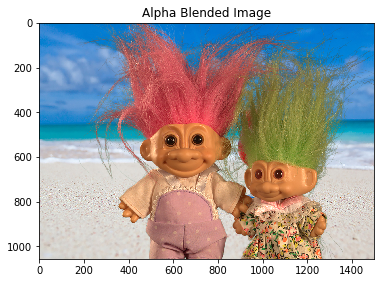

In [8]:
plt.imshow(outImage[:,:,::-1]/255)
plt.title("Alpha Blended Image")
plt.show()

# References and Further Reading

[https://en.wikipedia.org/wiki/Alpha_compositing](https://en.wikipedia.org/wiki/Alpha_compositing)